Dimensionality Reduction

In [ ]:
from numpy import mean, std
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA Dimensionality Reduction

Worked Example of LDA for Dimensionality

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=7, n_classes=10)

In [ ]:
steps = [('lda', LinearDiscriminantAnalysis(n_components=5)), ('m', GaussianNB())]

In [ ]:
model = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(n_scores): .3f}, {std(n_scores): .3f}')

Accuracy:  0.314,  0.049


How do we know that reducing 20 dimensions of input down to five is good or the best we can
do?

In [ ]:
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                              n_redundant=5, random_state=7, n_classes=10)
    return X, y

In [ ]:
def get_models():
    models = dict()
    for i in range(1,10):
        steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('m', GaussianNB())]
        models[str(i)] = Pipeline(steps=steps)
    return models

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
    return scores

In [ ]:
X, y = get_dataset()

In [ ]:
models = get_models()

In [ ]:
results, names = list(), list()

In [ ]:
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f'{name} > {mean(scores):.3f}  {std(scores): .3f}')

1 > 0.182   0.032
2 > 0.235   0.036
3 > 0.267   0.038
4 > 0.303   0.037
5 > 0.314   0.049
6 > 0.314   0.040
7 > 0.329   0.042
8 > 0.343   0.045
9 > 0.358   0.056


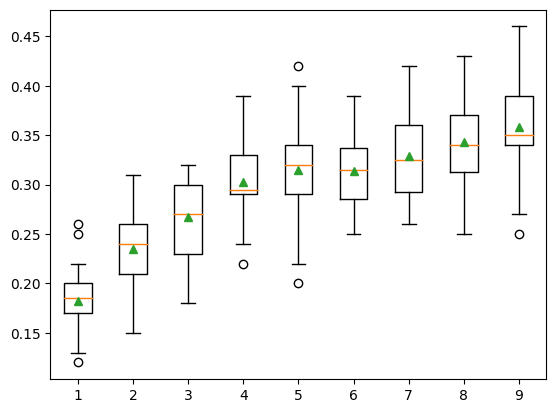

In [ ]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

We may choose to use an LDA transform and Naive Bayes model combination as our final
model. This involves fitting the Pipeline on all available data and using the pipeline to make predictions on new data.

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=7, n_classes=10)

In [ ]:
steps = [('lda', LinearDiscriminantAnalysis(n_components=9)), ('m', GaussianNB())]

In [ ]:
model = Pipeline(steps=steps)

In [ ]:
model.fit(X, y)

Pipeline(steps=[('lda', LinearDiscriminantAnalysis(n_components=9)),
                ('m', GaussianNB())])

In [ ]:
row = [[2.3548775, -1.69674567, 1.6193882, -1.19668862, -2.85422348, -2.00998376,
16.56128782, 2.57257575, 9.93779782, 0.43415008, 6.08274911, 2.12689336, 1.70100279,
3.32160983, 13.02048541, -3.05034488, 2.06346747, -3.33390362, 2.45147541, -1.23455205]]

In [ ]:
yhat = model.predict(row)

In [ ]:
print(f'Predicted Class: {yhat[0]}')

Predicted Class: 6


# PCA Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                          n_redundant=5, random_state=7)

In [ ]:
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]

In [ ]:
model = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(n_scores):.3f} {std(n_scores):.3f}')

Accuracy: 0.816 0.034


How do we know that reducing 20 dimensions of input down to 10 is good or the best we
can do?

In [ ]:
def get_models():
    modesl = dict()
    for i in range(1, 21):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

In [ ]:
X, y = get_dataset()

In [ ]:
models = get_models()

In [ ]:
results, names = list(), list()

In [ ]:
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f'{name} > {mean(scores): .3f}  {mean(scores): .3f}')

1 >  0.140   0.140
2 >  0.147   0.147
3 >  0.152   0.152
4 >  0.176   0.176
5 >  0.171   0.171
6 >  0.205   0.205
7 >  0.240   0.240
8 >  0.263   0.263
9 >  0.274   0.274
10 >  0.285   0.285
11 >  0.287   0.287
12 >  0.305   0.305
13 >  0.311   0.311
14 >  0.306   0.306
15 >  0.323   0.323
16 >  0.323   0.323
17 >  0.323   0.323
18 >  0.323   0.323
19 >  0.323   0.323
20 >  0.323   0.323


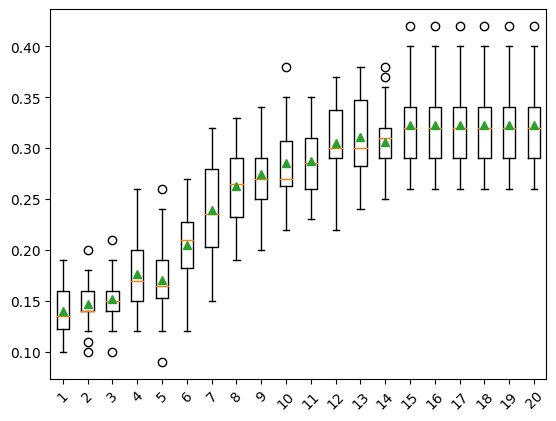

In [ ]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

The example below provides an example of fitting and using a final model with PCA transforms on new data.

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                          n_redundant=5, random_state=7)

In [ ]:
steps = [('pca', PCA(n_components=15)), ('m', LogisticRegression())]

In [ ]:
model = Pipeline(steps=steps)

In [ ]:
model.fit(X, y)

Pipeline(steps=[('pca', PCA(n_components=15)), ('m', LogisticRegression())])

In [ ]:
row = [[0.2929949, -4.21223056, -1.288332, -2.17849815, -0.64527665, 2.58097719,
0.28422388, -7.1827928, -1.91211104, 2.73729512, 0.81395695, 3.96973717, -2.66939799,
3.34692332, 4.19791821, 0.99990998, -0.30201875, -4.43170633, -2.82646737, 0.44916808]]

In [ ]:
yhat = model.predict(row)

In [ ]:
print(f'Predicted Class: {yhat[0]}')

Predicted Class: 1


# SVD Dimensionality Reduction

Worked Example of SVD for Dimensionality

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                          n_redundant=5, random_state=7)

In [ ]:
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())]

In [ ]:
model = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'Accuracy: {mean(n_scores): .3f}  {std(n_scores): .3f}')

Accuracy:  0.814   0.034


How do we know that reducing 20 dimensions of input down to 10 is good or the best we
can do?

In [ ]:
def get_models():
    models = dict()
    for i in range(1, 20):
        steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

In [ ]:
X, y = get_dataset()

In [ ]:
models = get_models()

In [ ]:
results, names = list(), list()

In [ ]:
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f'{name}> {mean(scores):.3f}  {std(scores):.3f}')

1> 0.140  0.024
2> 0.147  0.021
3> 0.152  0.023
4> 0.177  0.032
5> 0.171  0.036
6> 0.204  0.038
7> 0.236  0.037
8> 0.265  0.035
9> 0.279  0.036
10> 0.288  0.035
11> 0.289  0.034
12> 0.306  0.037
13> 0.309  0.037
14> 0.308  0.033
15> 0.323  0.039
16> 0.323  0.039
17> 0.323  0.039
18> 0.323  0.039
19> 0.323  0.039


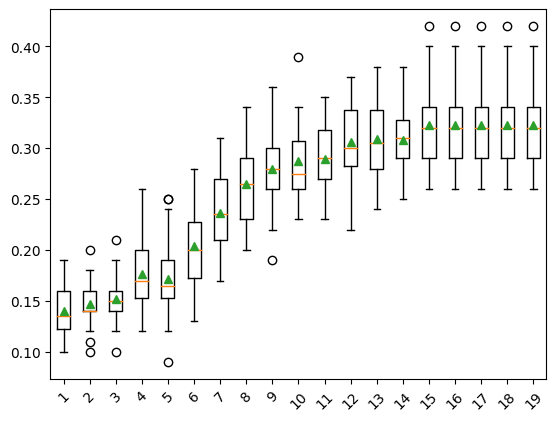

In [ ]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

We may choose to use an SVD transform and logistic regression model combination as our
final model.

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                          n_redundant=5, random_state=7)

In [ ]:
steps = [('svd', TruncatedSVD(n_components=15)), ('m', LogisticRegression())]

In [ ]:
model = Pipeline(steps=steps)

In [ ]:
model.fit(X, y)

Pipeline(steps=[('svd', TruncatedSVD(n_components=15)),
                ('m', LogisticRegression())])

In [ ]:
row = [[0.2929949, -4.21223056, -1.288332, -2.17849815, -0.64527665, 2.58097719,
0.28422388, -7.1827928, -1.91211104, 2.73729512, 0.81395695, 3.96973717, -2.66939799,
3.34692332, 4.19791821, 0.99990998, -0.30201875, -4.43170633, -2.82646737, 0.44916808]]

In [ ]:
yhat = model.predict(row)

In [ ]:
print(f'Predicted Class: {yhat[0]}')

Predicted Class: 1
